Importing Libraries

In [11]:

import pandas as pd
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn import metrics
import hydroeval as he
from sklearn.utils import resample  
from sklearn.tree import DecisionTreeRegressor

Importing Data

In [12]:
df=pd.read_csv('Data (1).csv')
df.head(10)

,Unnamed: 0,Year,Mon,Month,PRCP,TMAX,TMIN,RH,EVP,TSUN,U2,PET,SPI
0,1,Jan-61,1,JAN,1.0,33.6,19.4,69,5.8,7.2,3.0,168.883256,0.493176
1,2,Feb-61,2,FEB,0.0,34.8,17.2,47,9.3,8.2,3.0,167.010819,-0.253347
2,3,Mar-61,3,MAR,6.9,32.3,22.2,57,8.4,6.7,3.0,160.905812,-1.494443
3,4,Apr-61,4,APR,148.5,31.9,22.8,74,4.4,6.4,3.0,153.172840,0.735983
4,5,May-61,5,MAY,120.9,31.1,22.2,78,2.9,6.7,3.0,147.606832,-0.496127
5,6,Jun-61,6,JUN,175.3,29.5,21.1,81,2.4,6.1,4.0,119.733799,-0.156356
6,7,Jul-61,7,JUL,127.3,28.8,21.1,85,1.7,2.6,4.0,122.098866,-0.269629
7,8,Aug-61,8,AUG,44.7,28.6,20.0,82,2.3,3.9,4.0,131.889089,-1.391956
8,9,Sep-61,9,SEP,167.6,29.3,20.5,85,2.0,3.7,3.0,149.650889,-0.692826
9,10,Oct-61,10,OCT,45.2,28.9,20.5,76,3.1,6.6,3.0,153.223513,-1.566671


In [13]:
df.drop(columns='Unnamed: 0', inplace=True)

In [14]:
#Descriptive statistics
df.describe()

,Mon,PRCP,TMAX,TMIN,RH,EVP,TSUN,U2,PET,SPI
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,6.500000,102.525152,32.314545,21.242273,74.492424,4.921970,6.257879,4.260455,159.356288,0.161051
std,3.454671,97.089377,2.502484,1.705846,12.609037,2.806012,1.527646,1.442903,25.997336,0.915672
min,1.000000,0.000000,27.600000,11.300000,22.000000,1.000000,2.200000,1.000000,101.769129,-3.181531
25%,3.750000,7.800000,30.100000,20.500000,69.000000,2.600000,5.200000,3.000000,138.266980,-0.267953
50%,6.500000,86.200000,32.400000,21.400000,78.000000,4.200000,6.600000,4.000000,158.015148,0.253347
75%,9.250000,169.825000,34.300000,22.200000,84.000000,6.900000,7.400000,5.100000,178.569226,0.675011
max,12.000000,511.700000,37.900000,26.200000,98.000000,13.800000,9.500000,8.600000,246.591195,3.094368



Correlation matrix:
           Mon      PRCP      TMAX      TMIN        RH       EVP      TSUN  \
Mon   1.000000  0.161663 -0.422416 -0.325203  0.318835 -0.416617 -0.164468   
PRCP  0.161663  1.000000 -0.584730  0.212441  0.646370 -0.668602 -0.437239   
TMAX -0.422416 -0.584730  1.000000  0.077437 -0.653463  0.748650  0.697006   
TMIN -0.325203  0.212441  0.077437  1.000000  0.338338 -0.102633 -0.014840   
RH    0.318835  0.646370 -0.653463  0.338338  1.000000 -0.790364 -0.474274   
EVP  -0.416617 -0.668602  0.748650 -0.102633 -0.790364  1.000000  0.494353   
TSUN -0.164468 -0.437239  0.697006 -0.014840 -0.474274  0.494353  1.000000   
U2   -0.249821  0.078112  0.007148  0.372551  0.044985  0.033774 -0.095670   
PET  -0.338680 -0.413278  0.807829  0.097076 -0.497305  0.547390  0.591075   
SPI   0.029718  0.378746  0.144849 -0.155919 -0.064192  0.049192  0.131802   

            U2       PET       SPI  
Mon  -0.249821 -0.338680  0.029718  
PRCP  0.078112 -0.413278  0.378746  
TMAX  0.0

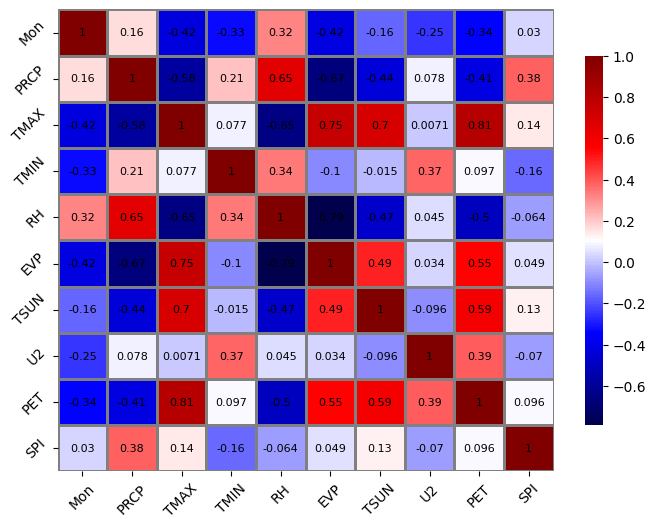

In [15]:
# Remove any non-numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = df_numeric.corr()
print("\nCorrelation matrix:")
print(corr)

# Display the correlation matrix
print("Correlation Matrix")
print(corr)
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr,
                      cmap='seismic', 
                      linewidth=0.75,
                      linecolor='gray',
                      cbar_kws={"shrink": .8},
                      annot=True,
                      annot_kws={'size': 8, 'color': 'black'})

heatmap.tick_params(labelsize=10, rotation=45)

In [16]:
df.drop(columns='Month', inplace=True)
df.drop(columns='Year', inplace=True)
df.drop(columns='Mon', inplace=True)

In [17]:
target='SPI'
y=df[target]
X=df.drop(columns=target)

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [20]:
# Build and fit an AdaBoost regressor
reg_ada = AdaBoostRegressor()
reg_ada.fit(X_train, y_train)

#Prediction Train
train_pred = reg_ada .predict(X_train)


print("prediction for Train")
print ('MAE is:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE is:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print ('R.Sqd is:', r2_score(y_train, train_pred))
print ('Cor is:', math.sqrt(r2_score(y_train, train_pred)))
print ('NSE is:', he.evaluator(he.nse, y_train, train_pred))
print('KGE is:', he.evaluator(he.kge, y_train, train_pred)) 
print('')
#Prediction Validation
y_pred_val =reg_ada.predict(X_valid)


print("prediction for Validation")
print ('MAE is:', metrics.mean_absolute_error(y_valid, y_pred_val))
print('MSE is:', metrics.mean_squared_error(y_valid, y_pred_val))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred_val)))
print ('R.Sqd is:', r2_score(y_valid, y_pred_val))
print ('Cor is:', math.sqrt(r2_score(y_valid, y_pred_val)))
print ('NSE is:', he.evaluator(he.nse, y_valid, y_pred_val))
print('KGE is:', he.evaluator(he.kge, y_valid, y_pred_val)) 


print('')
#Prediction Test
y_pred = reg_ada.predict(X_test)


print("prediction for Test")
print ('MAE is:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE is:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R.Sqd is:', r2_score(y_test, y_pred))
print ('Cor is:', math.sqrt(r2_score(y_test, y_pred)))
print ('NSE is:', he.evaluator(he.nse, y_test, y_pred))
print('KGE is:', he.evaluator(he.kge, y_test, y_pred)) 

prediction for Train
MAE is: 0.39513677765691907
MSE is: 0.2291342772662993
RMSE is: 0.4786797230573897
R.Sqd is: 0.7176019539810776
Cor is: 0.8471138966993031
NSE is: [0.40023604]
KGE is: [[0.51588772]
 [0.86614585]
 [1.45733481]
 [1.08539691]]

prediction for Validation
MAE is: 0.43816999954955665
MSE is: 0.3257056383068281
RMSE is: 0.5707062627191225
R.Sqd is: 0.6048113258079718
Cor is: 0.7776961654836494
NSE is: [0.11226359]
KGE is: [[0.34461426]
 [0.78957868]
 [1.49878649]
 [0.63058782]]

prediction for Test
MAE is: 0.4412279293895534
MSE is: 0.3047059159287223
RMSE is: 0.5520017354399552
R.Sqd is: 0.6692103675878746
Cor is: 0.8180527902207012
NSE is: [0.19263562]
KGE is: [[0.40629075]
 [0.84312122]
 [1.56227991]
 [1.10826366]]


In [21]:
# Number of bootstrap iterations
n_bootstrap_samples = 100  
bootstrap_metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

# Perform bootstrapping
for _ in range(n_bootstrap_samples):
    # Create a bootstrap sample
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train)

    # Build and fit the AdaBoost regressor
    reg_ada = AdaBoostRegressor()
    reg_ada.fit(X_train_bootstrap, y_train_bootstrap)
    
    # Predict on the test set
    y_pred_bootstrap = reg_ada.predict(X_test)
    
    # Calculate and store the metrics
    bootstrap_metrics['MAE'].append(mean_absolute_error(y_test, y_pred_bootstrap))
    bootstrap_metrics['MSE'].append(mean_squared_error(y_test, y_pred_bootstrap))
    bootstrap_metrics['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred_bootstrap)))
    bootstrap_metrics['R2'].append(r2_score(y_test, y_pred_bootstrap))

# Calculate the mean and standard deviation of each metric
for metric, values in bootstrap_metrics.items():
    print(f'{metric}: Mean = {np.mean(values):.4f}, Std = {np.std(values):.4f}')

MAE: Mean = 0.4525, Std = 0.0210
MSE: Mean = 0.3514, Std = 0.0315
RMSE: Mean = 0.5922, Std = 0.0264
R2: Mean = 0.6185, Std = 0.0342


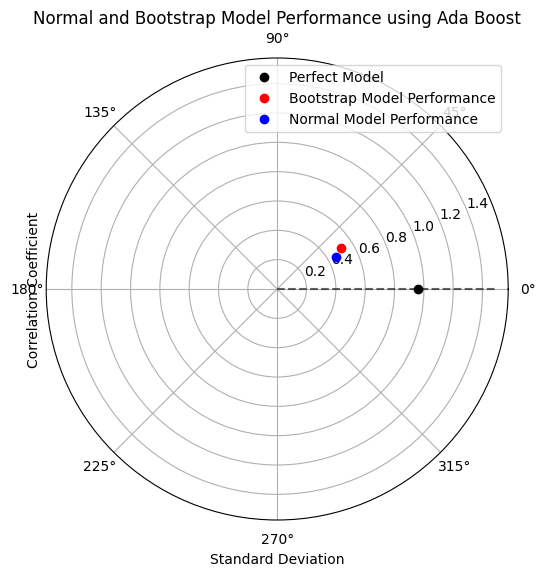

In [39]:
# Values from your normal model prediction
rmse_normal = 0.4609
correlation_normal = 0.8771

# Mean and standard deviation values from your bootstrap results
mean_rmse_bootstrap = 0.5200 
std_rmse_bootstrap = 0.0218  
mean_r2_bootstrap = 0.7059   
std_r2_bootstrap = 0.0249    

# Mean R² to correlation coefficient
mean_correlation_bootstrap = np.sqrt(mean_r2_bootstrap)

# Taylor plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)
observed_std=np.std(y_test)
# Reference point for a perfect model
ax.plot(0, observed_std, 'ko', label='Perfect Model')

# Point for the bootstrap model performance
theta_bootstrap = np.arccos(mean_correlation_bootstrap)
ax.plot(theta_bootstrap, mean_rmse_bootstrap, 'ro', label='Bootstrap Model Performance')

# Point for the normal model performance
theta_normal = np.arccos(correlation_normal)
ax.plot(theta_normal, rmse_normal, 'bo', label='Normal Model Performance')

# Draw standard deviation circles
std_devs = np.linspace(0, 1.5, 100)
ax.plot(np.zeros_like(std_devs), std_devs, 'k--', alpha=0.6)

# Configure the Taylor plot appearance
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Normal and Bootstrap Model Performance using Ada Boost')

plt.legend()
plt.show()

In [23]:
#Monte Carlo Cross-Validation fOr Ada Boost Regressor
n_iterations = 100
mccv_metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

# Monte Carlo Cross-Validation
for _ in range(n_iterations):
    # Randomly split the data
    X_train_mccv, X_val_mccv, y_train_mccv, y_val_mccv = train_test_split(X_train, y_train, test_size=0.2)

    # Build and fit the AdaBoost regressor
    reg_ada = AdaBoostRegressor()
    reg_ada.fit(X_train_mccv, y_train_mccv)
    
    # Predict on the validation set
    y_pred_mccv = reg_ada.predict(X_val_mccv)
    
    # Calculate and store the metrics
    mccv_metrics['MAE'].append(mean_absolute_error(y_val_mccv, y_pred_mccv))
    mccv_metrics['MSE'].append(mean_squared_error(y_val_mccv, y_pred_mccv))
    mccv_metrics['RMSE'].append(np.sqrt(mean_squared_error(y_val_mccv, y_pred_mccv)))
    mccv_metrics['R2'].append(r2_score(y_val_mccv, y_pred_mccv))

# Calculate the mean and standard deviation of each metric
for metric, values in mccv_metrics.items():
    print(f'{metric}: Mean = {np.mean(values):.4f}, Std = {np.std(values):.4f}')


MAE: Mean = 0.4682, Std = 0.0439
MSE: Mean = 0.3880, Std = 0.0773
RMSE: Mean = 0.6199, Std = 0.0613
R2: Mean = 0.5106, Std = 0.0762


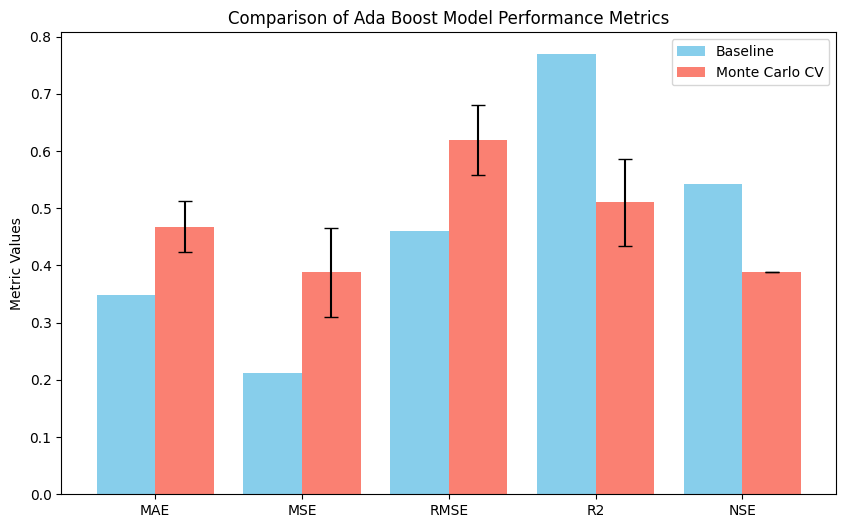

In [24]:
# Baseline metrics from your Adaboost original train-test split
baseline_metrics = {
    'MAE': 0.3492,
    'MSE': 0.2125,
    'RMSE': 0.4610,
    'R2': 0.7693,
    'NSE': 0.5423
}
# Mean metrics from Monte Carlo Cross-Validation
mccv_mean_metrics = {metric: np.mean(values) for metric, values in mccv_metrics.items()}
mccv_std_metrics = {metric: np.std(values) for metric, values in mccv_metrics.items()}

# Prepare data for plotting
metrics_names = list(baseline_metrics.keys())
baseline_values = list(baseline_metrics.values())
mccv_values = [mccv_mean_metrics['MAE'], mccv_mean_metrics['MSE'], mccv_mean_metrics['RMSE'], mccv_mean_metrics['R2'], mccv_mean_metrics['MSE']]

x = np.arange(len(metrics_names))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 0.2, baseline_values, 0.4, color='skyblue', label='Baseline')  # Change color for baseline bars
ax.bar(x + 0.2, mccv_values, 0.4, color='salmon', yerr=[mccv_std_metrics['MAE'], mccv_std_metrics['MSE'], mccv_std_metrics['RMSE'], mccv_std_metrics['R2'], 0], 
       label='Monte Carlo CV', capsize=5)  # Change color for MCCV bars

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylabel('Metric Values')
ax.set_title('Comparison of Ada Boost Model Performance Metrics')
ax.legend()

plt.show()


In [25]:
# Build and fit an Random Forest regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

#Prediction Train
train_pred = rf .predict(X_train)


print("prediction for Train")
print ('MAE is:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE is:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print ('R.Sqd is:', r2_score(y_train, train_pred))
print ('Cor is:', math.sqrt(r2_score(y_train, train_pred)))
print ('NSE is:', he.evaluator(he.nse, y_train, train_pred))
print('KGE is:', he.evaluator(he.kge, y_train, train_pred))


print('')
#Prediction Validation
y_pred_val =rf.predict(X_valid)

print("prediction for Validation")
print ('MAE is:', metrics.mean_absolute_error(y_valid, y_pred_val))
print('MSE is:', metrics.mean_squared_error(y_valid, y_pred_val))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred_val)))
print ('R.Sqd is:', r2_score(y_valid, y_pred_val))
print ('Cor is:', math.sqrt(r2_score(y_valid, y_pred_val)))
print ('NSE is:', he.evaluator(he.nse, y_valid, y_pred_val))
print('KGE is:', he.evaluator(he.kge, y_valid, y_pred_val)) 


print('')
#Prediction Test
y_pred = rf.predict(X_test)

print("prediction for Test")
print ('MAE is:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE is:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R.Sqd is:', r2_score(y_test, y_pred))
print ('Cor is:', math.sqrt(r2_score(y_test, y_pred)))
print ('NSE is:', he.evaluator(he.nse, y_test, y_pred))
print('KGE is:', he.evaluator(he.kge, y_test, y_pred)) 

prediction for Train
MAE is: 0.15065943774414142
MSE is: 0.04484151357982718
RMSE is: 0.2117581487920292
R.Sqd is: 0.9447347818643603
Cor is: 0.971974681699251
NSE is: [0.92521692]
KGE is: [[0.77539109]
 [0.97967671]
 [1.16325712]
 [1.15291578]]

prediction for Validation
MAE is: 0.3751384738598485
MSE is: 0.26507656543543867
RMSE is: 0.514855868603475
R.Sqd is: 0.678374445716154
Cor is: 0.8236348983112324
NSE is: [0.42500321]
KGE is: [[0.58139586]
 [0.8278064 ]
 [1.33708013]
 [0.82123823]]

prediction for Test
MAE is: 0.3685532962263637
MSE is: 0.27303111409065456
RMSE is: 0.5225237928464641
R.Sqd is: 0.7035966249889035
Cor is: 0.8388066672296445
NSE is: [0.42315098]
KGE is: [[0.56015032]
 [0.8495479 ]
 [1.39504914]
 [1.12152402]]


In [26]:
n_boostrap_samples=100
bootstrap_metrics={'MSE':[], 'MAE':[], 'RMSE':[], 'R2':[]}
 
for i in range(n_bootstrap_samples):
     X_train_bootstrap, y_train_bootstrap=resample(X_train, y_train)
     rf=RandomForestRegressor()
     rf.fit(X_train_bootstrap, y_train_bootstrap)
     y_pred_bootstrap=rf.predict(X_test)
     bootstrap_metrics['MSE'].append(mean_squared_error(y_pred_bootstrap, y_test))
     bootstrap_metrics['MAE'].append(mean_absolute_error(y_pred_bootstrap, y_test))
     bootstrap_metrics['RMSE'].append(np.sqrt(mean_squared_error(y_pred_bootstrap, y_test)))
     bootstrap_metrics['R2'].append(r2_score(y_pred_bootstrap, y_test))
     

# Calculate the mean and standard deviation of each metric
for metric, values in bootstrap_metrics.items():
    print(f'{metric}: Mean = {np.mean(values):.4f}, Std = {np.std(values):.4f}')

MSE: Mean = 0.3134, Std = 0.0293
MAE: Mean = 0.4011, Std = 0.0182
RMSE: Mean = 0.5592, Std = 0.0258
R2: Mean = 0.3140, Std = 0.1075


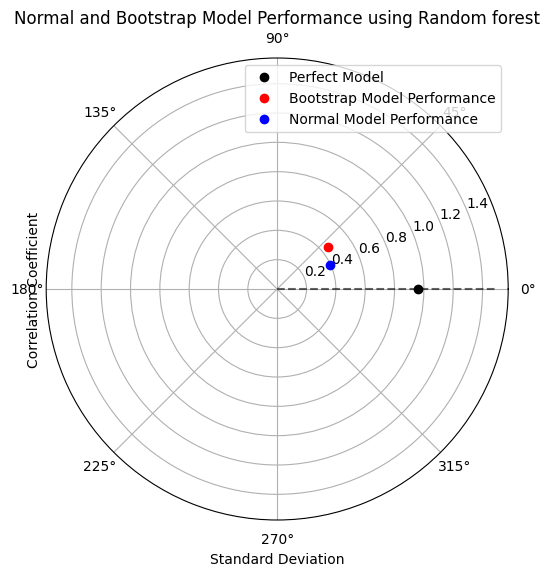

In [40]:
# Values from normal model prediction
rmse_normal = 0.3993
correlation_normal = 0.9093

# Mean and standard deviation values from your bootstrap results
mean_rmse_bootstrap = 0.4495
std_rmse_bootstrap = 0.0321
mean_r2_bootstrap = 0.5972 
std_r2_bootstrap = 0.0754   

# Mean R² to correlation coefficient
mean_correlation_bootstrap = np.sqrt(mean_r2_bootstrap)

# Taylor plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)
observed_std=np.std(y_test)
# Reference point for a perfect model
ax.plot(0, observed_std, 'ko', label='Perfect Model')

# Point for the bootstrap model performance
theta_bootstrap = np.arccos(mean_correlation_bootstrap)
ax.plot(theta_bootstrap, mean_rmse_bootstrap, 'ro', label='Bootstrap Model Performance')

# Point for the normal model performance
theta_normal = np.arccos(correlation_normal)
ax.plot(theta_normal, rmse_normal, 'bo', label='Normal Model Performance')

# Draw standard deviation circles
std_devs = np.linspace(0, 1.5, 100)
ax.plot(np.zeros_like(std_devs), std_devs, 'k--', alpha=0.6)

# Configure the Taylor plot appearance
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Normal and Bootstrap Model Performance using Random forest')

plt.legend()
plt.show()

In [28]:
#  Monte Carlo Cross-Validation for Random forest n_iterations = 100
mccv_metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

# Perform Monte Carlo Cross-Validation
for _ in range(n_iterations):
    # Randomly split the data
    X_train_mccv, X_val_mccv, y_train_mccv, y_val_mccv = train_test_split(X_train, y_train, test_size=0.2)

    # Build and fit the AdaBoost regressor
    rf= RandomForestRegressor()
    rf.fit(X_train_mccv, y_train_mccv)
    
    # Predict on the validation set
    y_pred_mccv = reg_ada.predict(X_val_mccv)
    
    # Calculate and store the metrics
    mccv_metrics['MAE'].append(mean_absolute_error(y_val_mccv, y_pred_mccv))
    mccv_metrics['MSE'].append(mean_squared_error(y_val_mccv, y_pred_mccv))
    mccv_metrics['RMSE'].append(np.sqrt(mean_squared_error(y_val_mccv, y_pred_mccv)))
    mccv_metrics['R2'].append(r2_score(y_val_mccv, y_pred_mccv))

# Calculate the mean and standard deviation of each metric
for metric, values in mccv_metrics.items():
    print(f'{metric}: Mean = {np.mean(values):.4f}, Std = {np.std(values):.4f}')

MAE: Mean = 0.4003, Std = 0.0357
MSE: Mean = 0.2574, Std = 0.0544
RMSE: Mean = 0.5047, Std = 0.0522
R2: Mean = 0.6743, Std = 0.0510


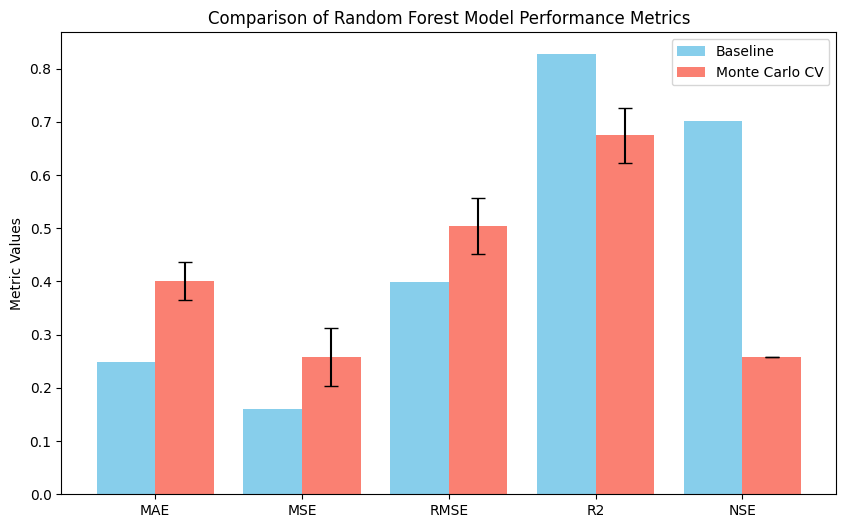

In [29]:
# Baseline metrics from your original train-test split
baseline_metrics = {
    'MAE': 0.2481,
    'MSE': 0.1595,
    'RMSE': 0.3993,
    'R2': 0.8269,
    'NSE': 0.7017
}


# Mean metrics from Monte Carlo Cross-Validation
mccv_mean_metrics = {metric: np.mean(values) for metric, values in mccv_metrics.items()}
mccv_std_metrics = {metric: np.std(values) for metric, values in mccv_metrics.items()}

# Prepare data for plotting
metrics_names = list(baseline_metrics.keys())
baseline_values = list(baseline_metrics.values())
mccv_values = [mccv_mean_metrics['MAE'], mccv_mean_metrics['MSE'], mccv_mean_metrics['RMSE'], mccv_mean_metrics['R2'], mccv_mean_metrics['MSE']]

x = np.arange(len(metrics_names))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 0.2, baseline_values, 0.4, color='skyblue', label='Baseline')  # Change color for baseline bars
ax.bar(x + 0.2, mccv_values, 0.4, color='salmon', yerr=[mccv_std_metrics['MAE'], mccv_std_metrics['MSE'], mccv_std_metrics['RMSE'], mccv_std_metrics['R2'], 0], 
       label='Monte Carlo CV', capsize=5)  # Change color for MCCV bars

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylabel('Metric Values')
ax.set_title('Comparison of Random Forest Model Performance Metrics')
ax.legend()

plt.show()


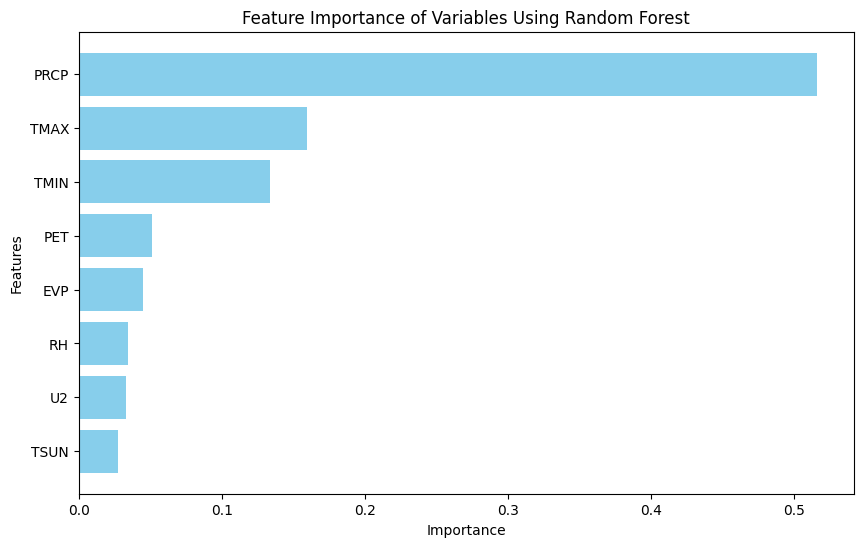

In [37]:
# Get feature importance using Random Forest model
importance = rf.feature_importances_
# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Variables Using Random Forest')
plt.gca().invert_yaxis()  # To display the highest importance feature at the top
plt.show()

In [30]:
# Build and fit Decision Tree regressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)

#Prediction Train
train_pred = DT.predict(X_train)


print("prediction for Train")
print ('MAE is:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE is:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print ('R.Sqd is:', r2_score(y_train, train_pred))
print ('Cor is:', math.sqrt(r2_score(y_train, train_pred)))
print ('NSE is:', he.evaluator(he.nse, y_train, train_pred))
print('KGE is:', he.evaluator(he.kge, y_train, train_pred))


print('')
#Prediction Validation
y_pred_val =DT.predict(X_valid)

print("prediction for Validation")
print ('MAE is:', metrics.mean_absolute_error(y_valid, y_pred_val))
print('MSE is:', metrics.mean_squared_error(y_valid, y_pred_val))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred_val)))
print ('R.Sqd is:', r2_score(y_valid, y_pred_val))
print ('Cor is:', math.sqrt(r2_score(y_valid, y_pred_val)))
print ('NSE is:', he.evaluator(he.nse, y_valid, y_pred_val))
print('KGE is:', he.evaluator(he.kge, y_valid, y_pred_val)) 


print('')
#Prediction Test
y_pred = DT.predict(X_test)

print("prediction for Test")
print ('MAE is:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE is:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE is:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R.Sqd is:', r2_score(y_test, y_pred))
print ('Cor is:', math.sqrt(r2_score(y_test, y_pred)))
print ('NSE is:', he.evaluator(he.nse, y_test, y_pred))
print('KGE is:', he.evaluator(he.kge, y_test, y_pred)) 

prediction for Train
MAE is: 2.803593496528173e-18
MSE is: 3.1126140515349266e-34
RMSE is: 1.7642601994986244e-17
R.Sqd is: 1.0
Cor is: 1.0
NSE is: [1.]
KGE is: [[1.]
 [1.]
 [1.]
 [1.]]

prediction for Validation
MAE is: 0.510389318371212
MSE is: 0.5436005196162494
RMSE is: 0.7372926960280086
R.Sqd is: 0.3404327608388853
Cor is: 0.583466160834444
NSE is: [0.38455916]
KGE is: [[0.45664383]
 [0.68524939]
 [0.96596995]
 [0.55840071]]

prediction for Test
MAE is: 0.42638059
MSE is: 0.4576258153382292
RMSE is: 0.6764804619042809
R.Sqd is: 0.5032000780928625
Cor is: 0.7093659690828582
NSE is: [0.35717448]
KGE is: [[0.68804667]
 [0.72584557]
 [1.13751149]
 [0.94303666]]


In [31]:
n_boostrap_samples=100
bootstrap_metrics={'MSE':[], 'MAE':[], 'RMSE':[], 'R2':[]}
 
for i in range(n_bootstrap_samples):
     X_train_bootstrap, y_train_bootstrap=resample(X_train, y_train)
     DT = DecisionTreeRegressor()
     DT.fit(X_train_bootstrap, y_train_bootstrap)
     y_pred_bootstrap=rf.predict(X_test)
     bootstrap_metrics['MSE'].append(mean_squared_error(y_pred_bootstrap, y_test))
     bootstrap_metrics['MAE'].append(mean_absolute_error(y_pred_bootstrap, y_test))
     bootstrap_metrics['RMSE'].append(np.sqrt(mean_squared_error(y_pred_bootstrap, y_test)))
     bootstrap_metrics['R2'].append(r2_score(y_pred_bootstrap, y_test))
     

# Calculate the mean and standard deviation of each metric
for metric, values in bootstrap_metrics.items():
    print(f'{metric}: Mean = {np.mean(values):.4f}, Std = {np.std(values):.4f}')

MSE: Mean = 0.2694, Std = 0.0000
MAE: Mean = 0.3529, Std = 0.0000
RMSE: Mean = 0.5190, Std = 0.0000
R2: Mean = 0.4406, Std = 0.0000


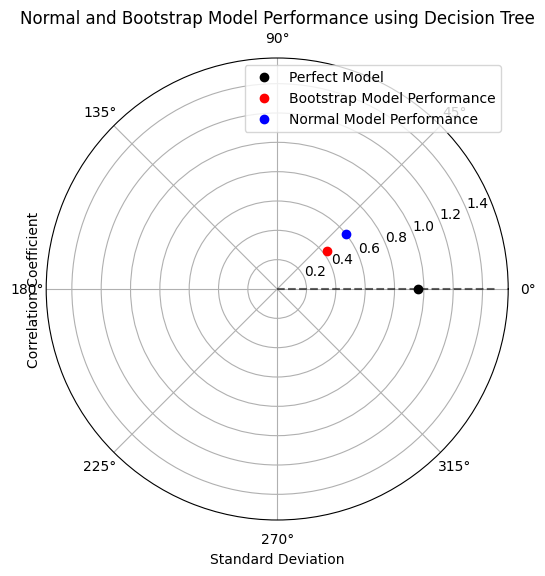

In [46]:
# Values from normal model prediction
rmse_normal = 0.6011
correlation_normal = 0.7796

# Mean and standard deviation values from your bootstrap results
mean_rmse_bootstrap = 0.4309
std_rmse_bootstrap = 0.0000  
mean_r2_bootstrap = 0.6306   
std_r2_bootstrap = 0.000   

# Mean R² to correlation coefficient
mean_correlation_bootstrap = np.sqrt(mean_r2_bootstrap)

# Taylor plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, polar=True)

observed_std = np.std(y_test) 

# Reference point for a perfect model
ax.plot(0, observed_std,'ko', label='Perfect Model')

# Point for the bootstrap model performance
theta_bootstrap = np.arccos(mean_correlation_bootstrap)
ax.plot(theta_bootstrap, mean_rmse_bootstrap, 'ro', label='Bootstrap Model Performance')

# Point for the normal model performance
theta_normal = np.arccos(correlation_normal)
ax.plot(theta_normal, rmse_normal, 'bo', label='Normal Model Performance')

# Draw standard deviation circles
std_devs = np.linspace(0, 1.5, 100)
ax.plot(np.zeros_like(std_devs), std_devs, 'k--', alpha=0.6)

# Configure the Taylor plot appearance
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Normal and Bootstrap Model Performance using Decision Tree')

plt.legend()
plt.show()

In [33]:
#  Monte Carlo Cross-Validation for Random forest n_iterations = 100
mccv_metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

# Perform Monte Carlo Cross-Validation
for _ in range(n_iterations):
    # Randomly split the data
    X_train_mccv, X_val_mccv, y_train_mccv, y_val_mccv = train_test_split(X_train, y_train, test_size=0.2)

    # Build and fit the AdaBoost regressor
    DT= DecisionTreeRegressor()
    DT.fit(X_train_mccv, y_train_mccv)
    
    # Predict on the validation set
    y_pred_mccv = DT.predict(X_val_mccv)
    
    # Calculate and store the metrics
    mccv_metrics['MAE'].append(mean_absolute_error(y_val_mccv, y_pred_mccv))
    mccv_metrics['MSE'].append(mean_squared_error(y_val_mccv, y_pred_mccv))
    mccv_metrics['RMSE'].append(np.sqrt(mean_squared_error(y_val_mccv, y_pred_mccv)))
    mccv_metrics['R2'].append(r2_score(y_val_mccv, y_pred_mccv))

# Calculate the mean and standard deviation of each metric
for metric, values in mccv_metrics.items():
    print(f'{metric}: Mean = {np.mean(values):.4f}, Std = {np.std(values):.4f}')

MAE: Mean = 0.5283, Std = 0.0585
MSE: Mean = 0.5961, Std = 0.1471
RMSE: Mean = 0.7662, Std = 0.0953
R2: Mean = 0.2437, Std = 0.2020


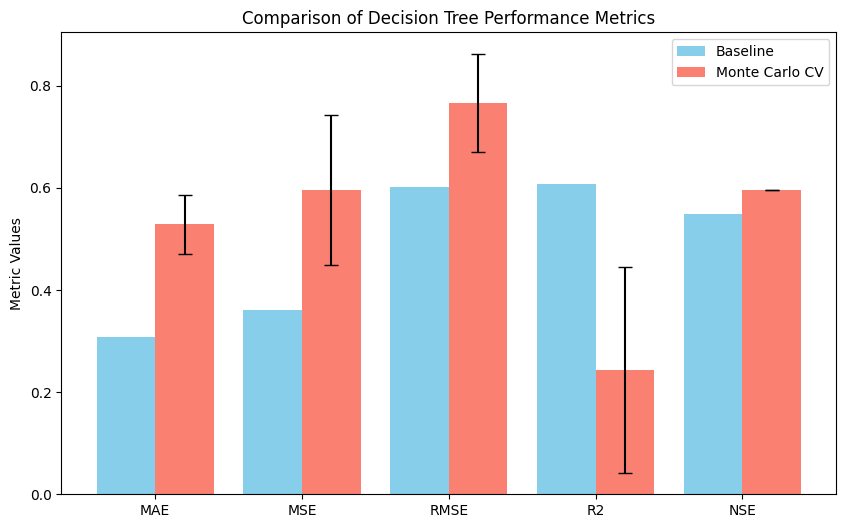

In [34]:
# Baseline metrics from your original train-test split
baseline_metrics = {
    'MAE': 0.3086,
    'MSE': 0.3613,
    'RMSE': 0.6011,
    'R2': 0.6078,
    'NSE': 0.5493
}

# Mean metrics from Monte Carlo Cross-Validation
mccv_mean_metrics = {metric: np.mean(values) for metric, values in mccv_metrics.items()}
mccv_std_metrics = {metric: np.std(values) for metric, values in mccv_metrics.items()}

# Prepare data for plotting
metrics_names = list(baseline_metrics.keys())
baseline_values = list(baseline_metrics.values())
mccv_values = [mccv_mean_metrics['MAE'], mccv_mean_metrics['MSE'], mccv_mean_metrics['RMSE'], mccv_mean_metrics['R2'], mccv_mean_metrics['MSE']]

x = np.arange(len(metrics_names))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 0.2, baseline_values, 0.4, color='skyblue', label='Baseline')  # Change color for baseline bars
ax.bar(x + 0.2, mccv_values, 0.4, color='salmon', yerr=[mccv_std_metrics['MAE'], mccv_std_metrics['MSE'], mccv_std_metrics['RMSE'], mccv_std_metrics['R2'], 0], 
       label='Monte Carlo CV', capsize=5)  # Change color for MCCV bars

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylabel('Metric Values')
ax.set_title('Comparison of Decision Tree Performance Metrics')
ax.legend()

plt.show()
